[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Analyzing Image Classification Dataset

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)

This notebook shows how you can use [fastdup](https://github.com/visual-layer/fastdup) to analyze an image classification dataset for:

+ Duplicates
+ Outliers
+ Wrong labels
+ Image clusters


> **Note** - No GPU needed! You can run this notebook on a CPU-only instance.



## Installation

First let's install [fastdup](https://github.com/visual-layer/fastdup) from PyPI with:

In [1]:
import sys
if "google.colab" in sys.modules:
    # Running in Google Colab
    !pip install --force-reinstall --no-cache-dir numpy==1.26.4 scipy fastdup
else:
    # Running outside Colab
    !pip install -Uq fastdup


Now, test the installation. If there's no error message, we are ready to go.

In [2]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.26'

## Download Dataset

We will analyze the [Imagenette](https://github.com/fastai/imagenette) dataset - a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xf imagenette2-160.tgz

## Load and Format Annotations

In [3]:
import pandas as pd

In [4]:
data_dir = 'imagenette2-160/'
csv_path = 'imagenette2-160/noisy_imagenette.csv'

In [5]:
label_map = {
    'n02979186': 'cassette_player', 
    'n03417042': 'garbage_truck', 
    'n01440764': 'tench', 
    'n02102040': 'English_springer', 
    'n03028079': 'church',
    'n03888257': 'parachute', 
    'n03394916': 'French_horn', 
    'n03000684': 'chain_saw', 
    'n03445777': 'golf_ball', 
    'n03425413': 'gas_pump'
}

Load the annotations provided with the dataset.

In [6]:
df_annot = pd.read_csv(csv_path)
df_annot.head(3)

path noisy_labels_0 noisy_labels_1 noisy_labels_5 noisy_labels_25 noisy_labels_50  is_valid
0   train/n02979186/n02979186_9036.JPEG      n02979186      n02979186      n02979186       n02979186       n02979186     False
1  train/n02979186/n02979186_11957.JPEG      n02979186      n02979186      n02979186       n02979186       n03000684     False
2   train/n02979186/n02979186_9715.JPEG      n02979186      n02979186      n02979186       n03417042       n03000684     False

Transform the annotations to fastdup supported format.

fastdup expects an annotation `DataFrame` that contains the following column:

+ filename - contains the path to the image file
+ label - contains a label of the image
+ split - whether the image is subset of the training, validation or test dataset

In [7]:
# take relevant columns
df_annot = df_annot[['path', 'noisy_labels_0']]

# rename columns to fastdup's column names
df_annot = df_annot.rename({'noisy_labels_0': 'label', 'path': 'filename'}, axis='columns')

# append datadir
df_annot['filename'] = df_annot['filename'].apply(lambda x: data_dir + x)

# create split column
df_annot['split'] = df_annot['filename'].apply(lambda x: x.split("/")[1])

# map label ids to regular labels
df_annot['label'] = df_annot['label'].map(label_map)

# show formated annotations
df_annot

filename            label  split
0               imagenette2-160/train/n02979186/n02979186_9036.JPEG  cassette_player  train
1              imagenette2-160/train/n02979186/n02979186_11957.JPEG  cassette_player  train
2               imagenette2-160/train/n02979186/n02979186_9715.JPEG  cassette_player  train
3              imagenette2-160/train/n02979186/n02979186_21736.JPEG  cassette_player  train
4      imagenette2-160/train/n02979186/ILSVRC2012_val_00046953.JPEG  cassette_player  train
...                                                             ...              ...    ...
13389            imagenette2-160/val/n03425413/n03425413_17521.JPEG         gas_pump    val
13390            imagenette2-160/val/n03425413/n03425413_20711.JPEG         gas_pump    val
13391            imagenette2-160/val/n03425413/n03425413_19050.JPEG         gas_pump    val
13392            imagenette2-160/val/n03425413/n03425413_13831.JPEG         gas_pump    val
13393             imagenette2-160/val/n03425413/n03425413_1242.JPEG         gas_pump    val

[13394 rows x 3 columns]

## Run fastdup

With the images and annotations ready, we can proceed with running an analysis on the data.

+ `input_dir` is the path to the downloaded images
+ `work_dir` is the path to store the artifacts from the analysis (optional)

In [8]:
fd = fastdup.create(input_dir=data_dir) 
fd.run(annotations=df_annot, ccthreshold=0.9, threshold=0.8)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-13 19:22:31 [INFO] Going to loop over dir /tmp/tmpqm6imqyr.csv
2023-07-13 19:22:31 [INFO] Found total 13394 images to run on, 13394 train, 0 test, name list 13394, counter 13394 
2023-07-13 19:23:04 [INFO] Found total 13394 images to run onimated: 0 Minutes
Finished histogram 3.121
Finished bucket sort 3.151
2023-07-13 19:23:04 [INFO] 544) Finished write_index() NN model
2023-07-13 19:23:04 [INFO] Stored nn model index file work_dir/nnf.index
2023-07-13 19:23:05 [INFO] Total time took 34024 ms
2023-07-13 19:23:05 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-07-13 19:23:05 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-07-13 19:23:05 [INFO] Found a total of 16764 above threshold images (d>0.800), which are 62.58 %
2023-07-13 19:23:05 [INFO] Found a total of 1339 outlier images         (d<0.050), which are 5.00 %
2023-07-13 19:23:05 [I

0

## Outliers

Visualize outliers from the dataset.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 26723.82it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html



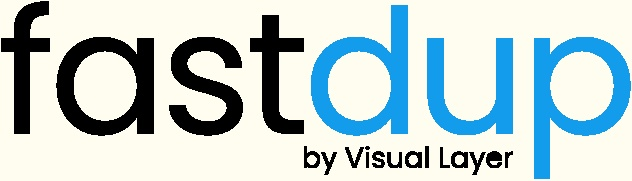
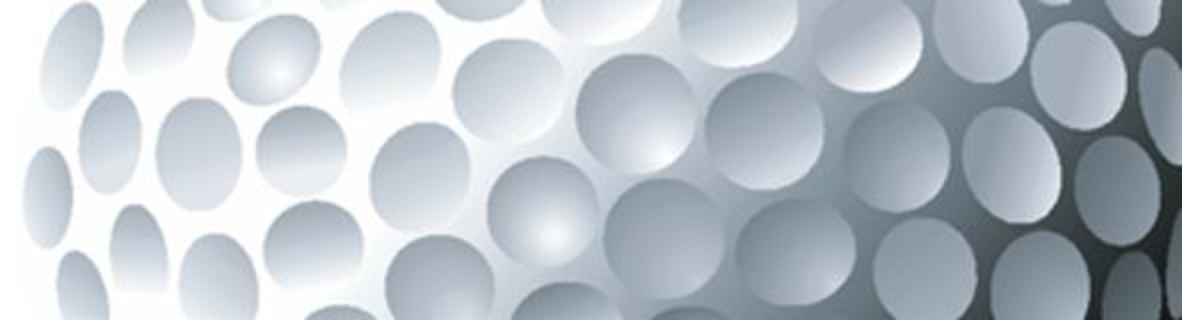
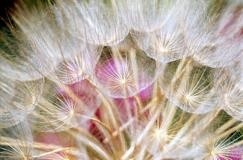
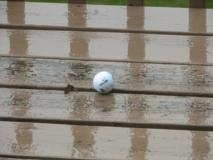
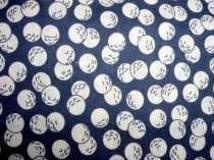
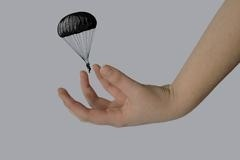
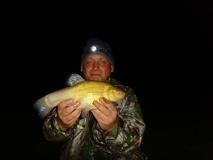
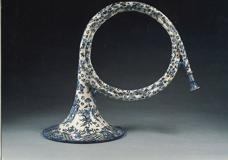
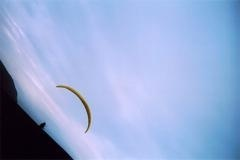
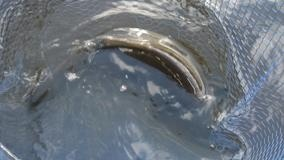
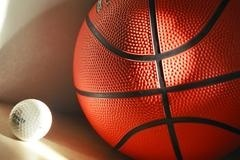
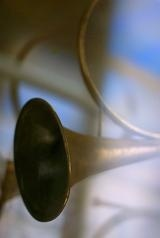
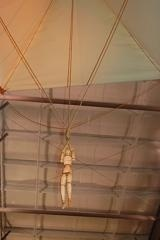
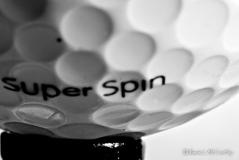
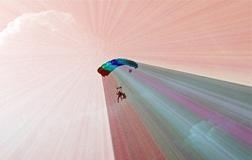
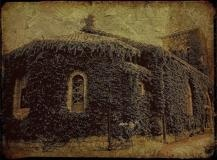
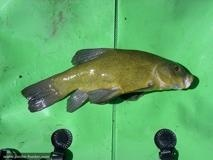
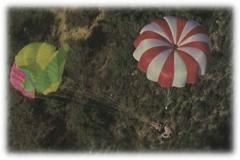
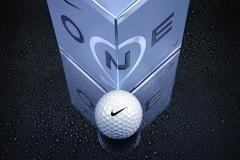
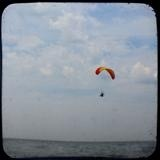
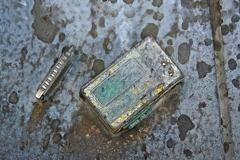

0

In [9]:
fd.vis.outliers_gallery()

Show outliers image data.

In [10]:
fd.outliers().head(5)

outlier  nearest  distance                                      filename_outlier label_outlier split_outlier  index_x error_code_outlier  is_valid_outlier  fd_index_outlier                                      filename_nearest     label_nearest split_nearest  index_y error_code_nearest  is_valid_nearest  fd_index_nearest
0     8293    13217  0.519030   imagenette2-160/train/n03445777/n03445777_5218.JPEG     golf_ball         train     8293              VALID              True              8293    imagenette2-160/val/n03425413/n03425413_11460.JPEG          gas_pump           val    13217              VALID              True             13217
1     5457     5500  0.544795  imagenette2-160/train/n03888257/n03888257_34639.JPEG     parachute         train     5457              VALID              True              5457  imagenette2-160/train/n03888257/n03888257_12053.JPEG         parachute         train     5500              VALID              True              5500
2     8076     3016  0.555266   imagenette2-160/train/n03445777/n03445777_3254.JPEG     golf_ball         train     8076              VALID              True              8076    imagenette2-160/train/n02102040/n02102040_585.JPEG  English_springer         train     3016              VALID              True              3016
3     2790     4510  0.568702   imagenette2-160/train/n01440764/n01440764_5638.JPEG         tench         train     2790              VALID              True              2790   imagenette2-160/train/n03028079/n03028079_6607.JPEG            church         train     4510              VALID              True              4510
4     5478    11775  0.582118  imagenette2-160/train/n03888257/n03888257_79145.JPEG     parachute         train     5478              VALID              True              5478     imagenette2-160/val/n03888257/n03888257_8080.JPEG         parachute           val    11775              VALID              True             11775

## Comparing Labels of Similar Images
Find possible mislabels by comparing a query image to other images in the dataset.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 237.91it/s]


Stored similar images visual view in  work_dir/galleries/similarity.html



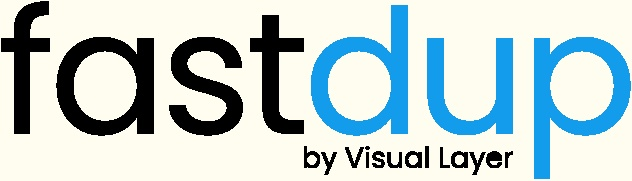
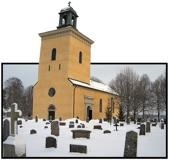
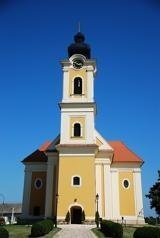
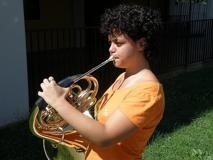
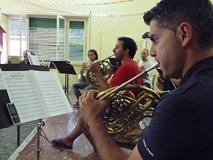
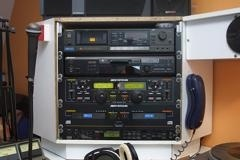
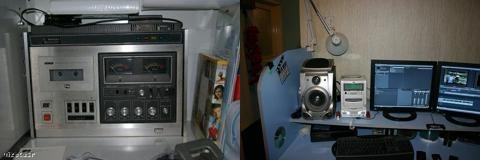
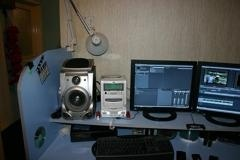
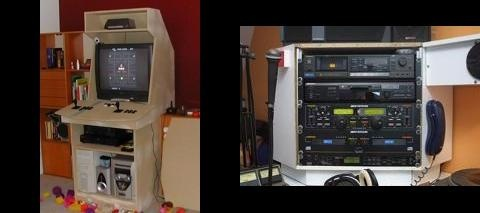
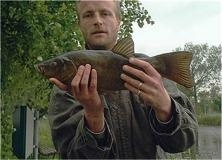
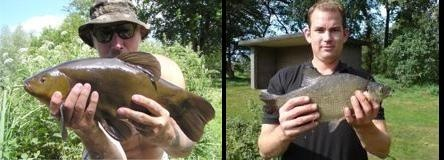
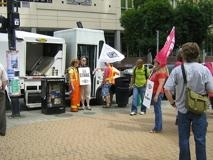
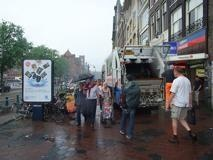
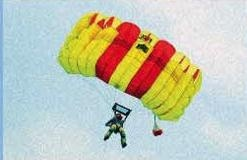
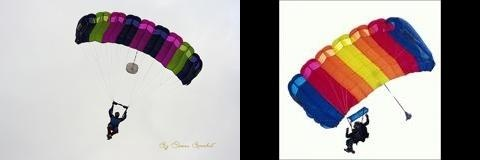
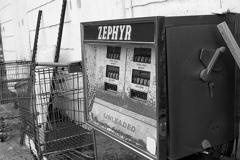
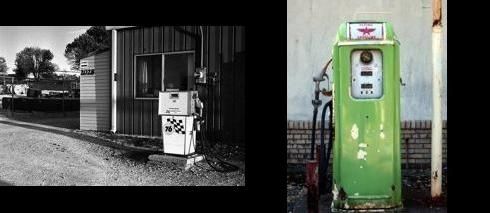
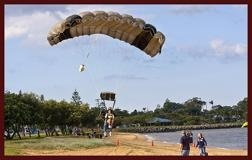
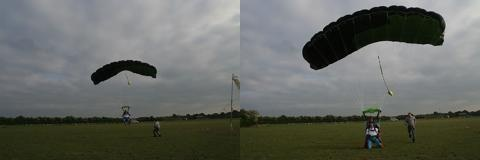
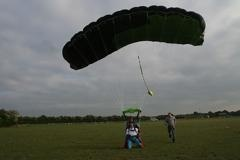
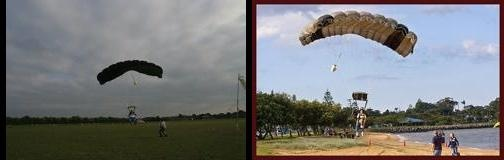
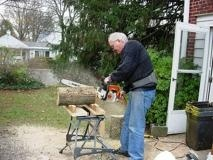
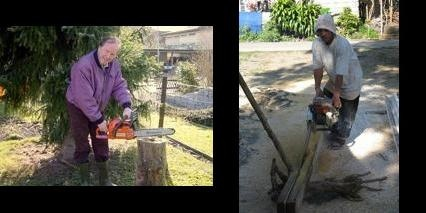
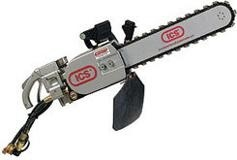
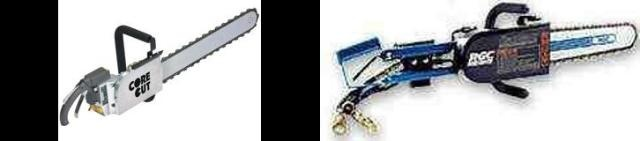
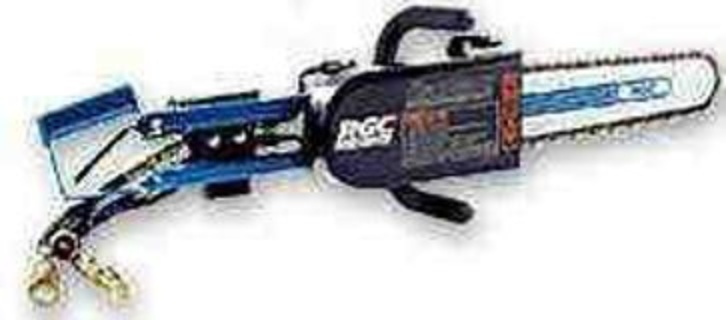
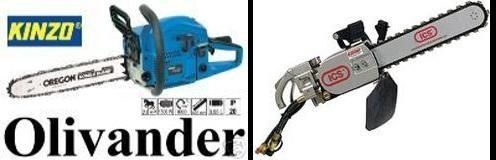
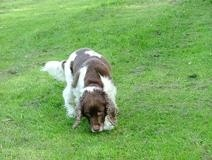
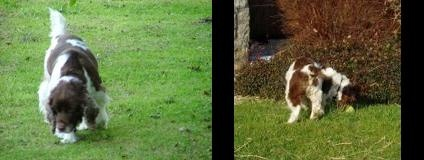
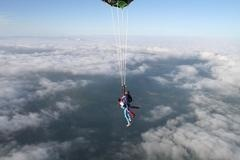
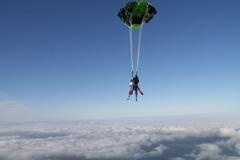
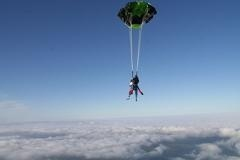
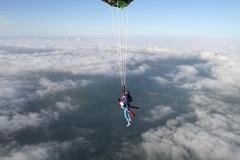
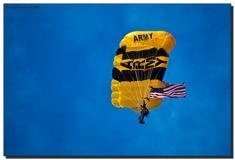
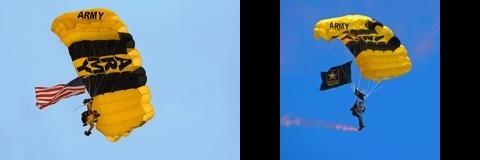
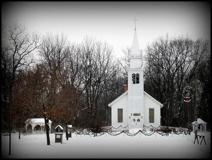
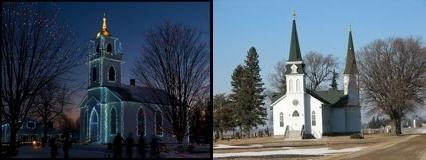
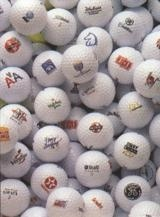
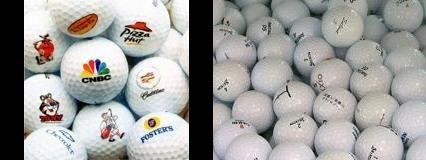
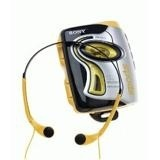
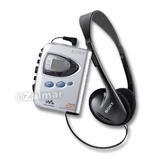

from                                                                                                            to                                 label                                label2              distance
7505    imagenette2-160/val/n03028079/n03028079_13002.JPEG                                                         [imagenette2-160/train/n03028079/n03028079_3839.JPEG]                              [church]                              [church]            [0.800002]
3429  imagenette2-160/train/n03394916/n03394916_32478.JPEG                                                        [imagenette2-160/train/n03394916/n03394916_35573.JPEG]                         [French_horn]                         [French_horn]            [0.800012]
1700  imagenette2-160/train/n02979186/n02979186_14524.JPEG      [imagenette2-160/val/n02979186/n02979186_11000.JPEG, imagenette2-160/train/n02979186/n02979186_213.JPEG]    [cassette_player, cassette_player]    [cassette_player, cassette_player]  [0.800015, 0.806502]
7055    imagenette2-160/val/n02979186/n02979186_11000.JPEG  [imagenette2-160/train/n02979186/n02979186_14524.JPEG, imagenette2-160/train/n02979186/n02979186_10095.JPEG]    [cassette_player, cassette_player]    [cassette_player, cassette_player]  [0.800015, 0.820827]
471      imagenette2-160/train/n01440764/n01440764_44.JPEG     [imagenette2-160/val/n01440764/n01440764_5490.JPEG, imagenette2-160/train/n01440764/n01440764_14249.JPEG]                        [tench, tench]                        [tench, tench]  [0.800023, 0.803563]
...                                                    ...                                                                                                           ...                                   ...                                   ...                   ...
870    imagenette2-160/train/n02102040/n02102040_1306.JPEG     [imagenette2-160/train/n02102040/n02102040_876.JPEG, imagenette2-160/train/n02102040/n02102040_3114.JPEG]  [English_springer, English_springer]  [English_springer, English_springer]  [0.936799, 0.949252]
1050   imagenette2-160/train/n02102040/n02102040_3114.JPEG    [imagenette2-160/train/n02102040/n02102040_1055.JPEG, imagenette2-160/train/n02102040/n02102040_1306.JPEG]  [English_springer, English_springer]  [English_springer, English_springer]  [0.941953, 0.949252]
231   imagenette2-160/train/n01440764/n01440764_13978.JPEG        [imagenette2-160/val/n01440764/n01440764_6341.JPEG, imagenette2-160/val/n01440764/n01440764_8210.JPEG]                        [tench, tench]                        [tench, tench]  [0.943767, 0.945909]
6846      imagenette2-160/val/n02102040/n02102040_350.JPEG       [imagenette2-160/val/n02102040/n02102040_312.JPEG, imagenette2-160/train/n02102040/n02102040_6313.JPEG]  [English_springer, English_springer]  [English_springer, English_springer]  [0.945413, 0.947323]
1339   imagenette2-160/train/n02102040/n02102040_6313.JPEG       [imagenette2-160/val/n02102040/n02102040_350.JPEG, imagenette2-160/train/n02102040/n02102040_3767.JPEG]  [English_springer, English_springer]  [English_springer, English_springer]  [0.947323, 0.950174]

[9069 rows x 5 columns]

In [11]:
fd.vis.similarity_gallery() 

## Similar Image Pairs

Find similar image pairs within and across the train and validation subfolders. Pairs may include train-train, train-val, val-train, and val-val.

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
100%|███████████████████████████████████████████████████████████████████████████████

Stored similarity visual view in  work_dir/galleries/duplicates.html



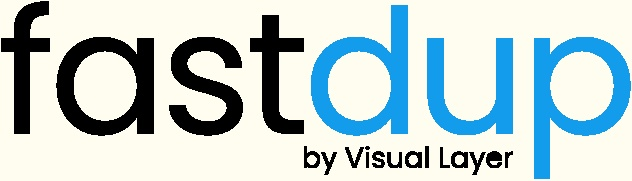
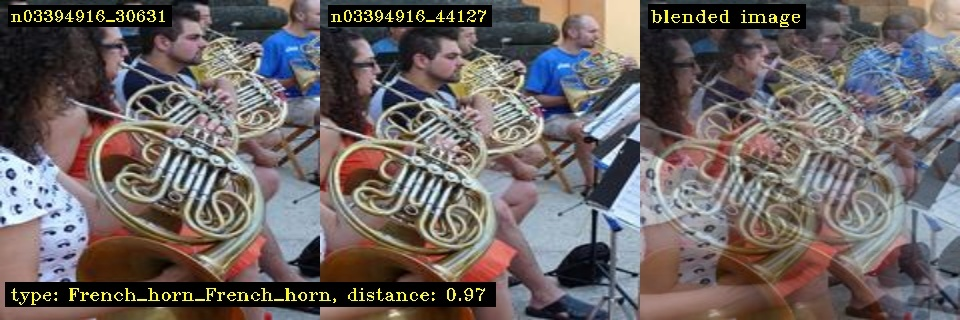
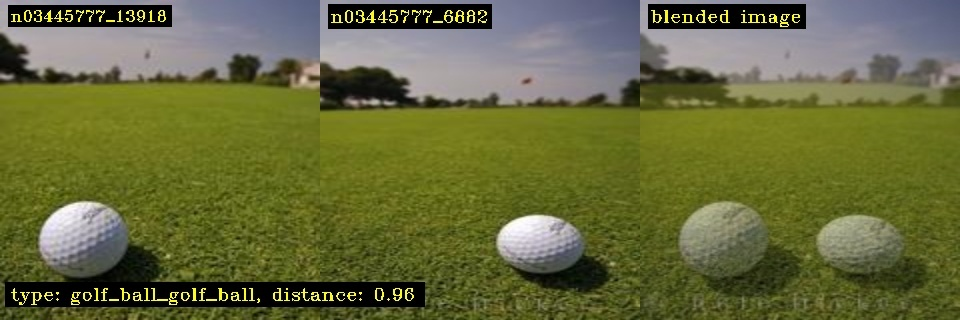
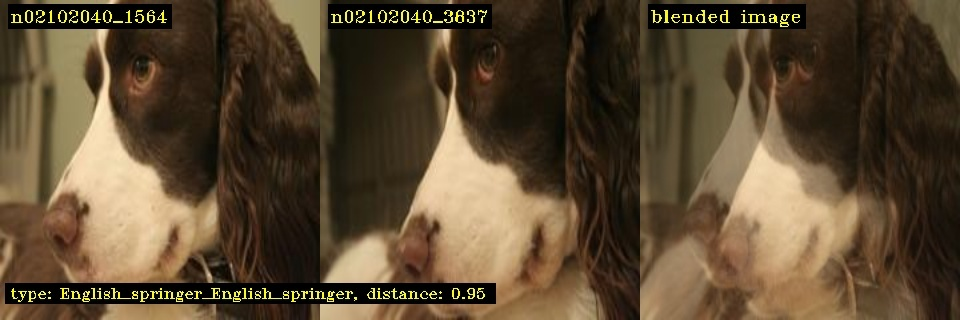
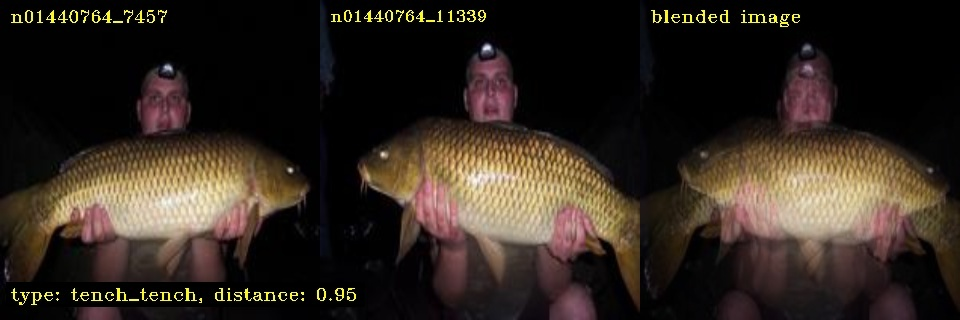
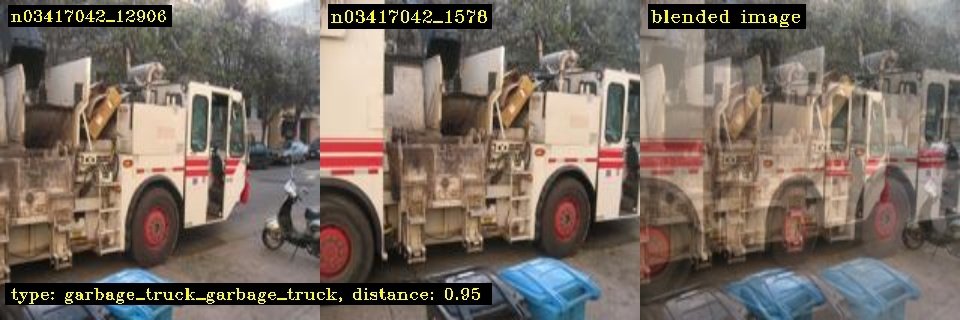
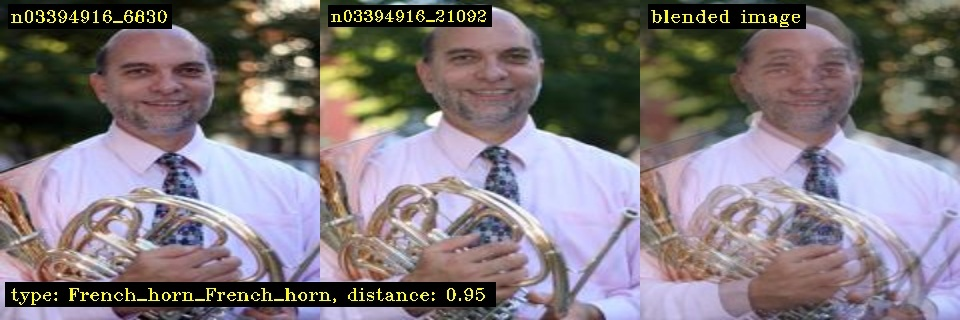
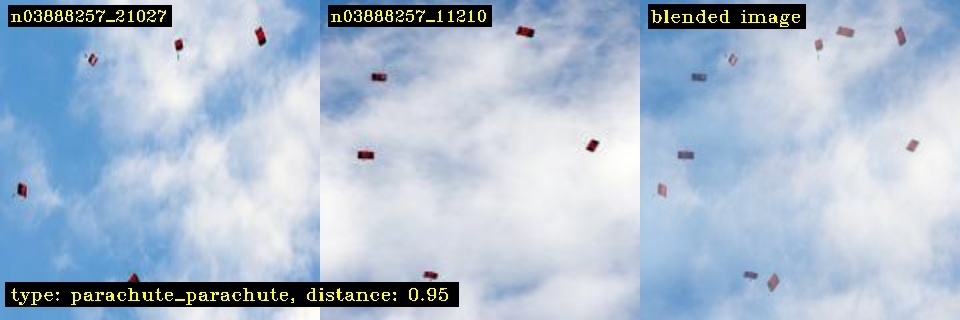
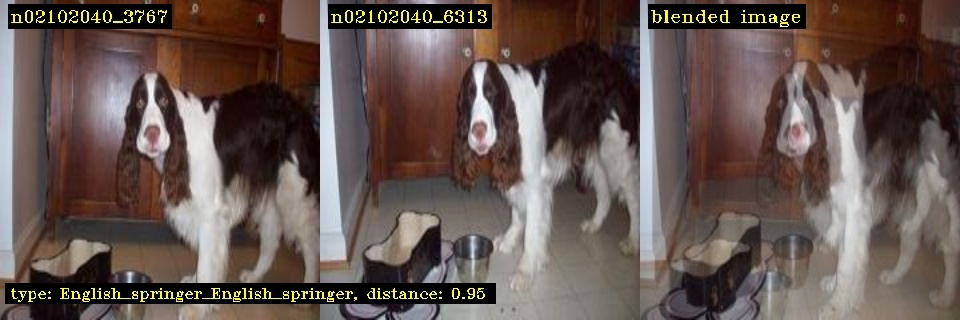
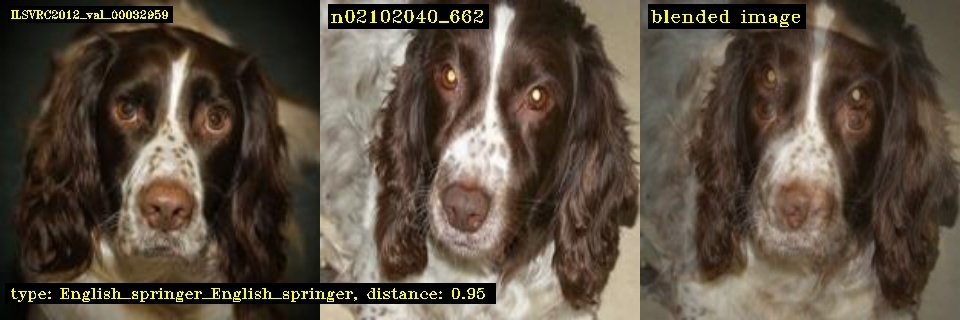
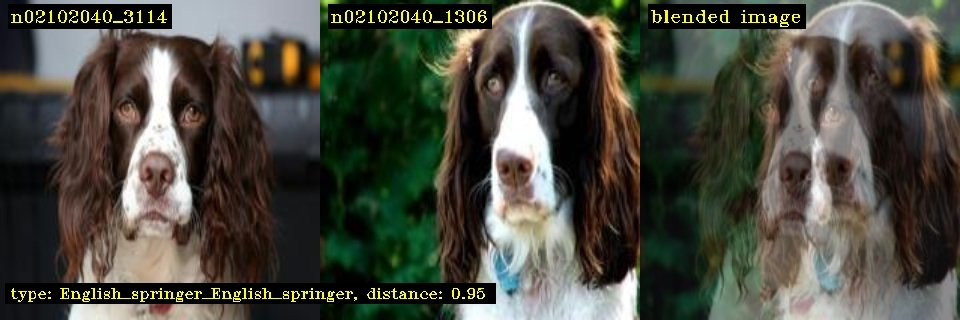

0

In [12]:
fd.vis.duplicates_gallery()

Show similar image pairs.

In [13]:
fd.similarity().head(5)

from     to  distance                                         filename_from        label_from split_from  index_x error_code_from  is_valid_from  fd_index_from                                           filename_to          label_to split_to  index_y error_code_to  is_valid_to  fd_index_to
0  11960   5925  0.968786    imagenette2-160/val/n03394916/n03394916_30631.JPEG       French_horn        val    11960           VALID           True          11960  imagenette2-160/train/n03394916/n03394916_44127.JPEG       French_horn    train     5925         VALID         True         5925
1   5925  11960  0.968786  imagenette2-160/train/n03394916/n03394916_44127.JPEG       French_horn      train     5925           VALID           True           5925    imagenette2-160/val/n03394916/n03394916_30631.JPEG       French_horn      val    11960         VALID         True        11960
2  12613   7916  0.962458     imagenette2-160/val/n03445777/n03445777_6882.JPEG         golf_ball        val    12613           VALID           True          12613  imagenette2-160/train/n03445777/n03445777_13918.JPEG         golf_ball    train     7916         VALID         True         7916
3   7916  12613  0.962458  imagenette2-160/train/n03445777/n03445777_13918.JPEG         golf_ball      train     7916           VALID           True           7916     imagenette2-160/val/n03445777/n03445777_6882.JPEG         golf_ball      val    12613         VALID         True        12613
4   3464   3486  0.953837   imagenette2-160/train/n02102040/n02102040_3837.JPEG  English_springer      train     3464           VALID           True           3464   imagenette2-160/train/n02102040/n02102040_1564.JPEG  English_springer    train     3486         VALID         True         3486

## Image Clusters

cassette_player


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.44it/s]


Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 1.5



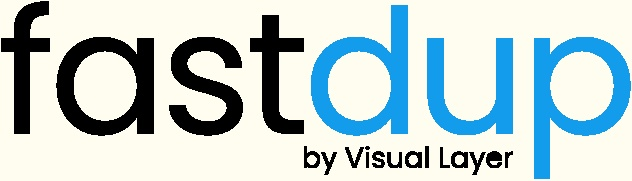
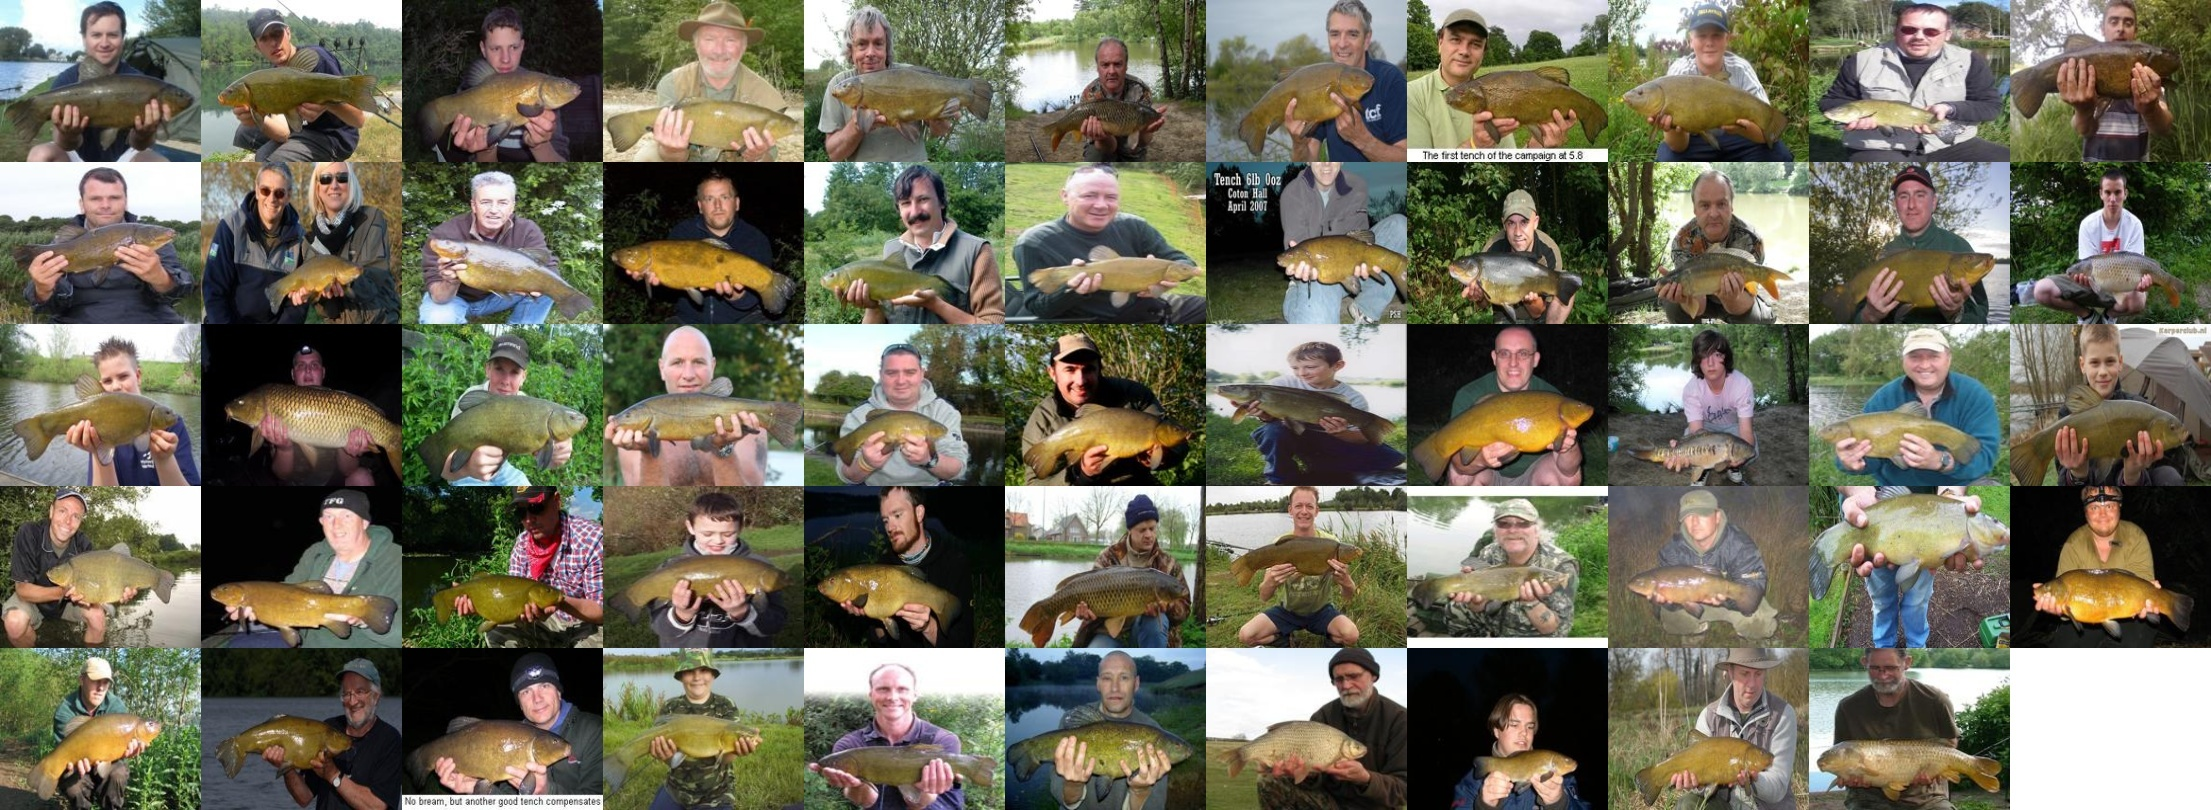
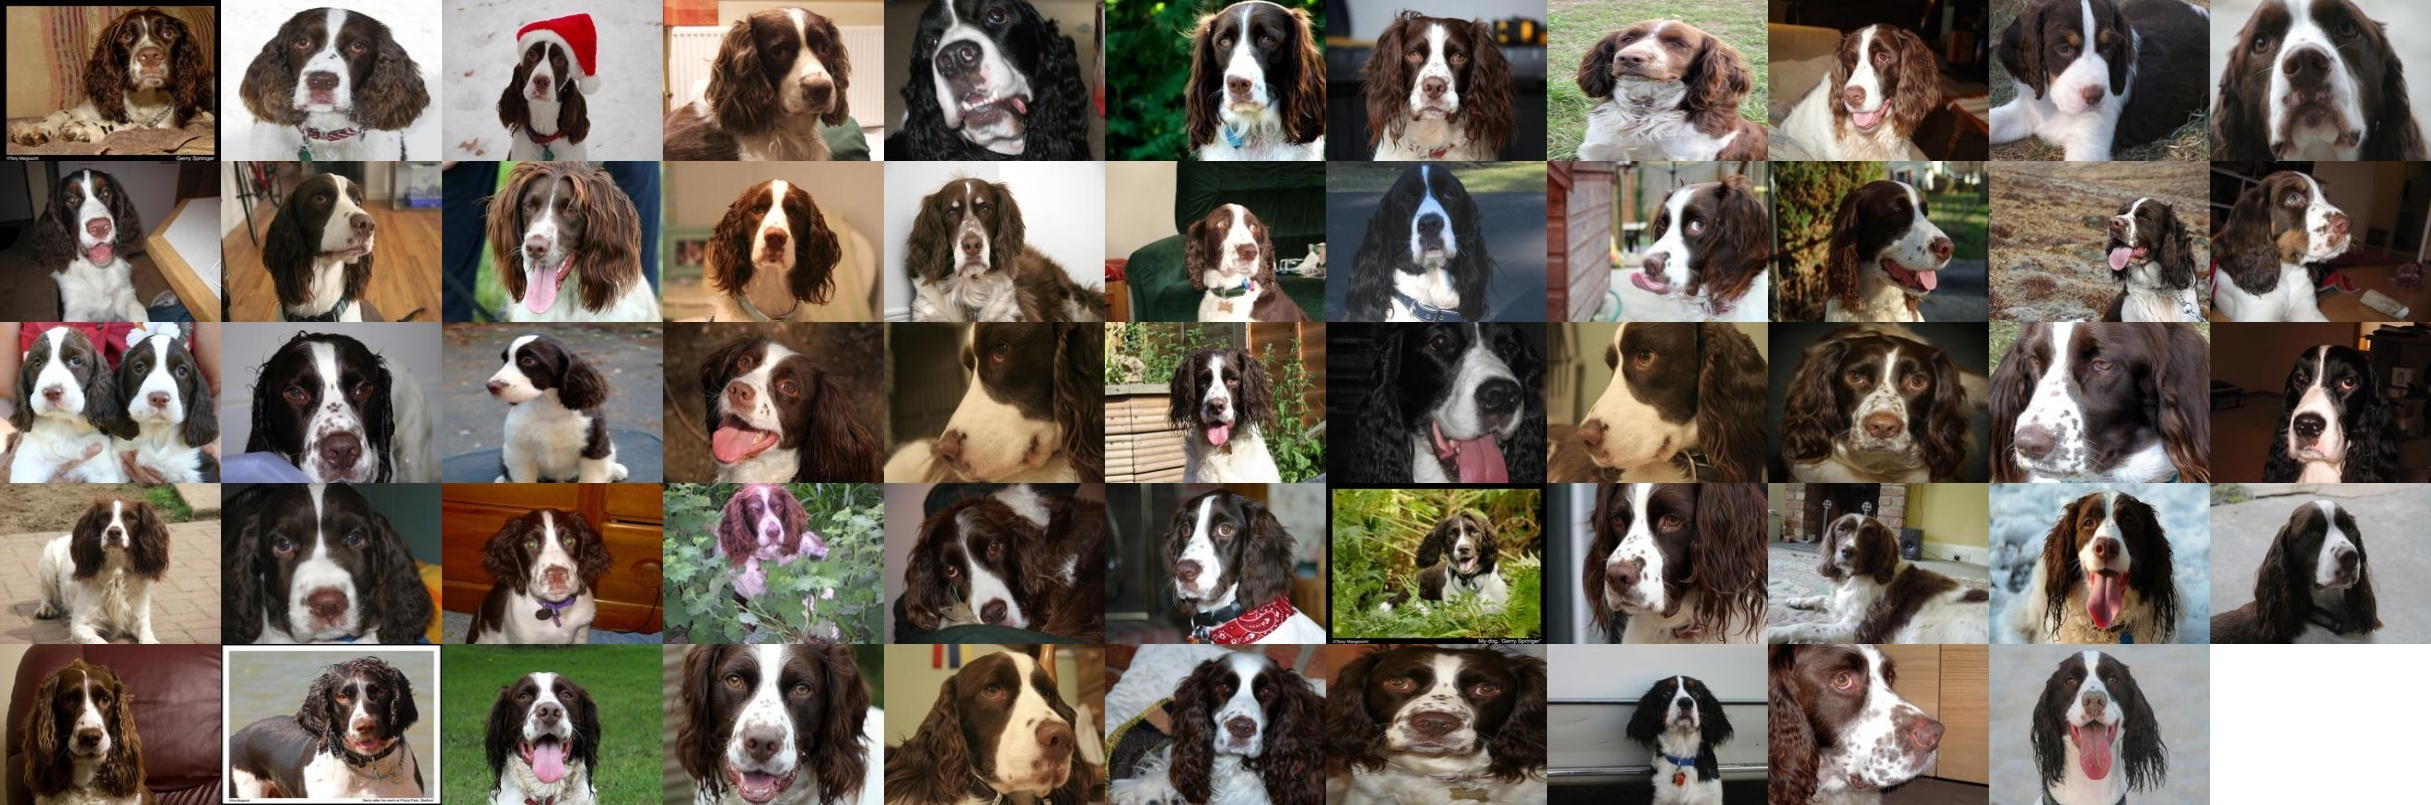
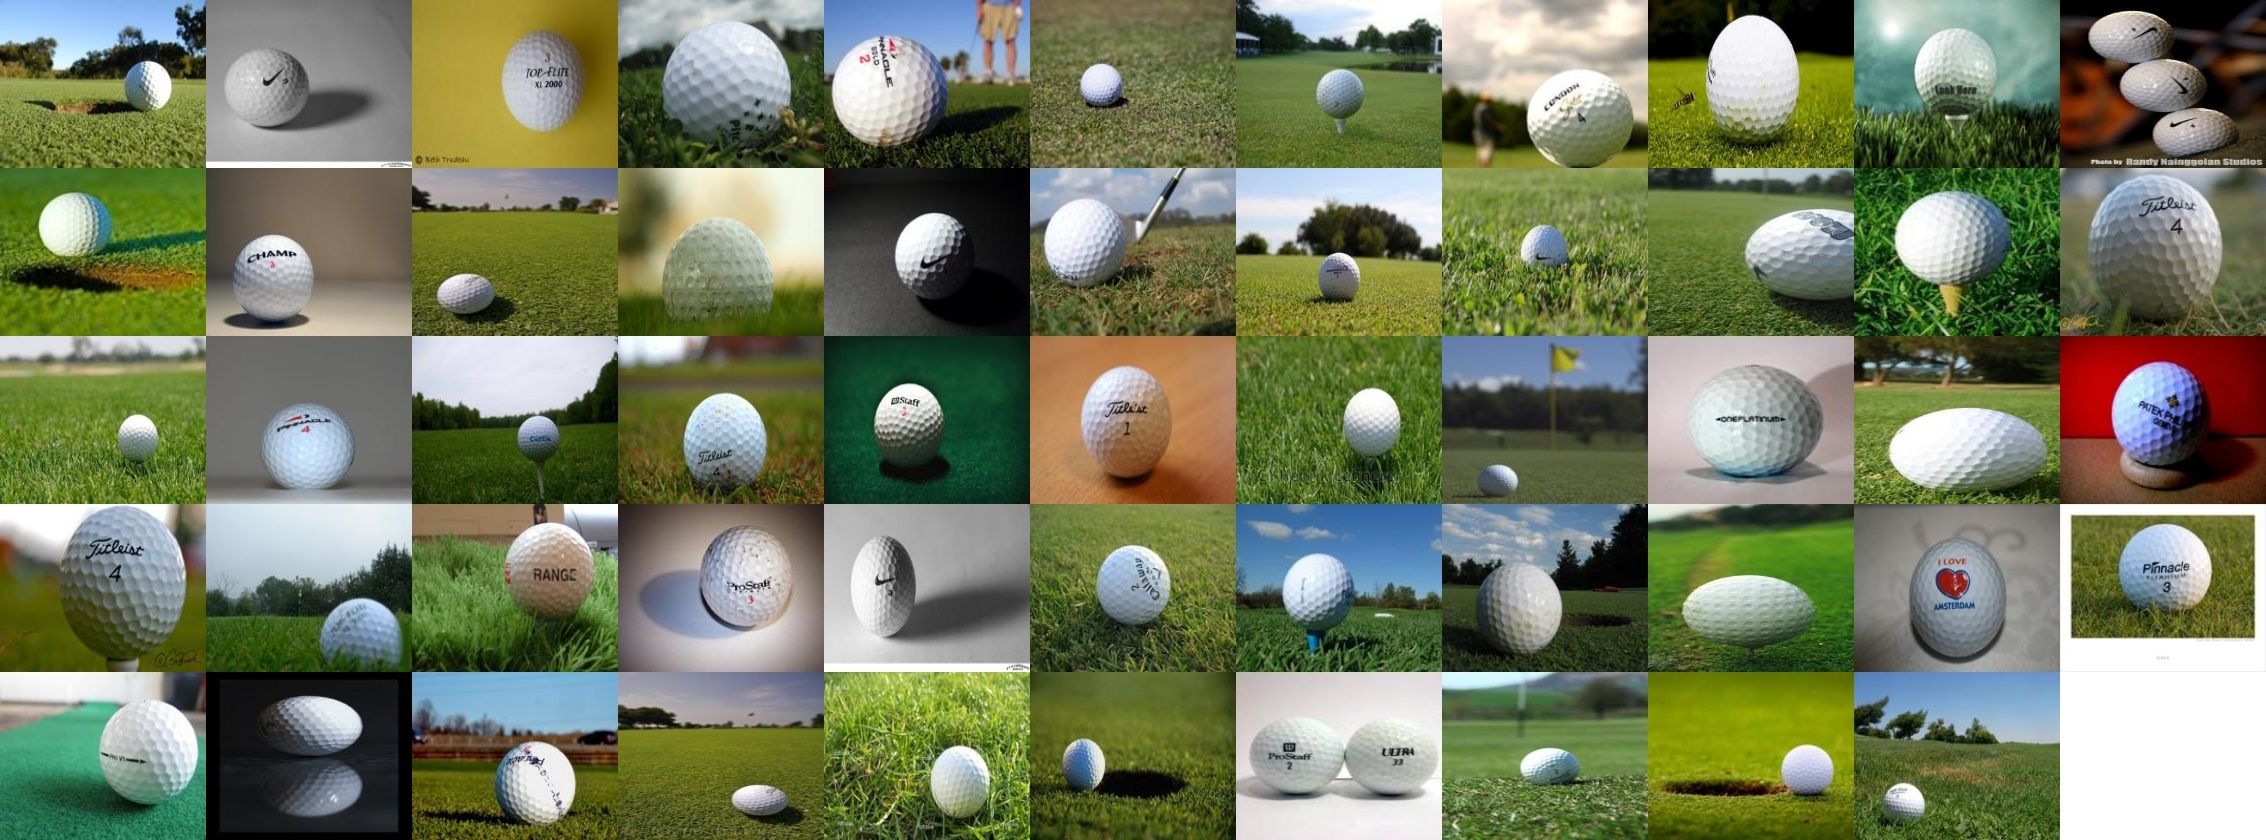
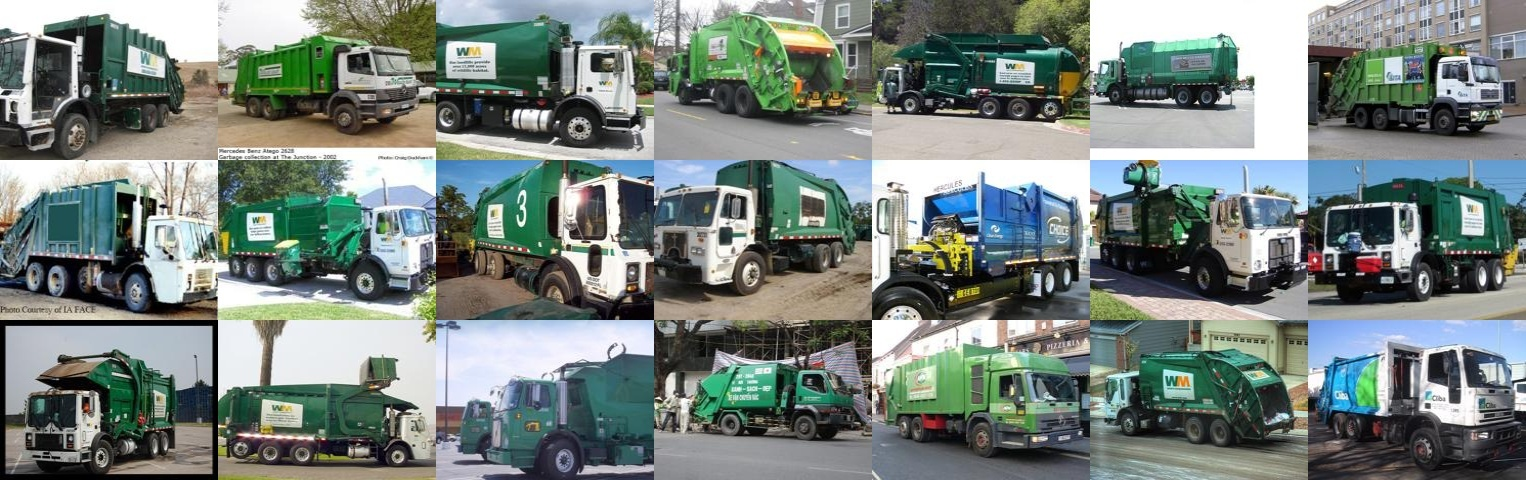
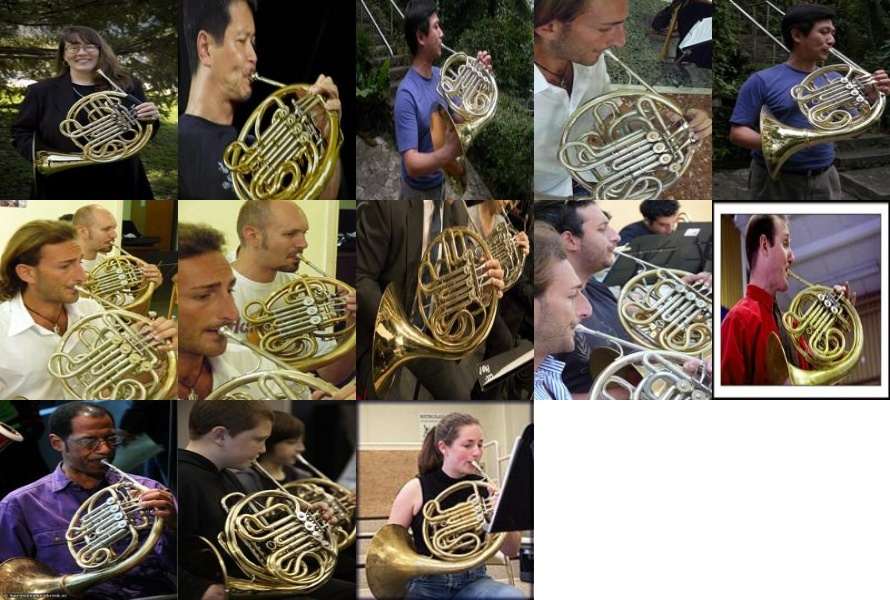
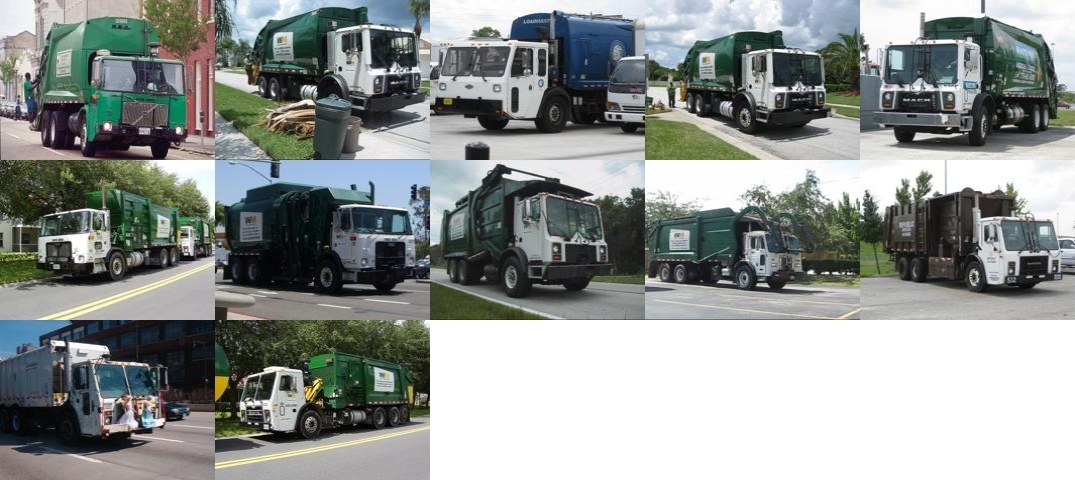
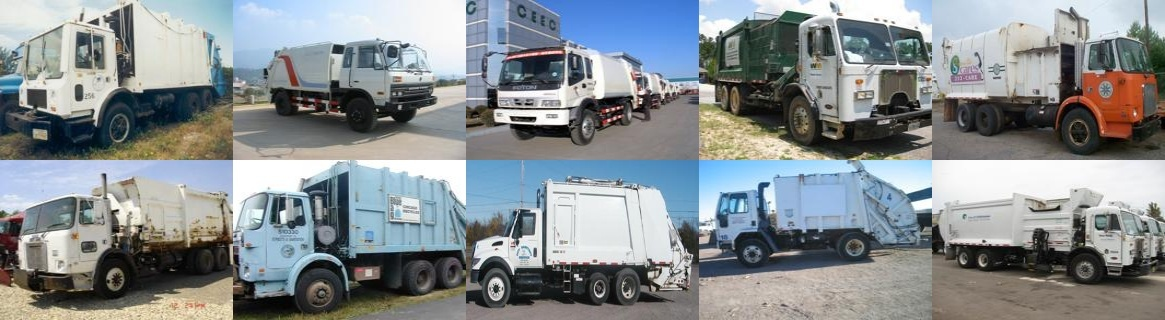
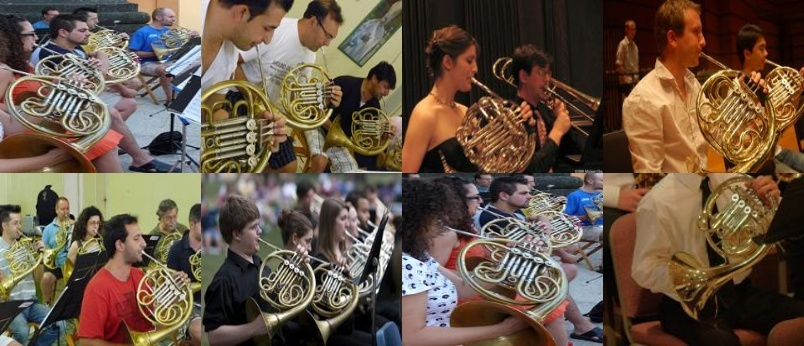
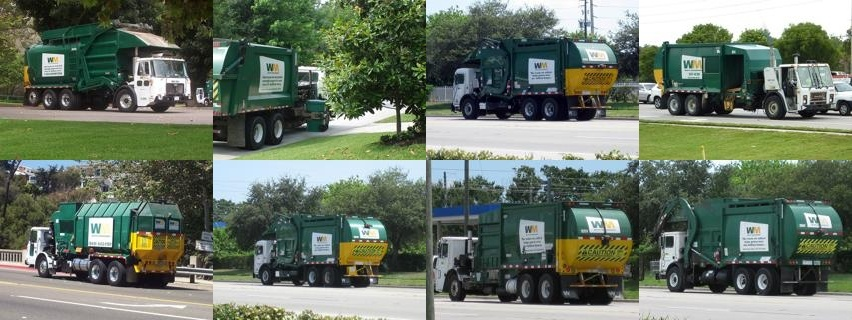
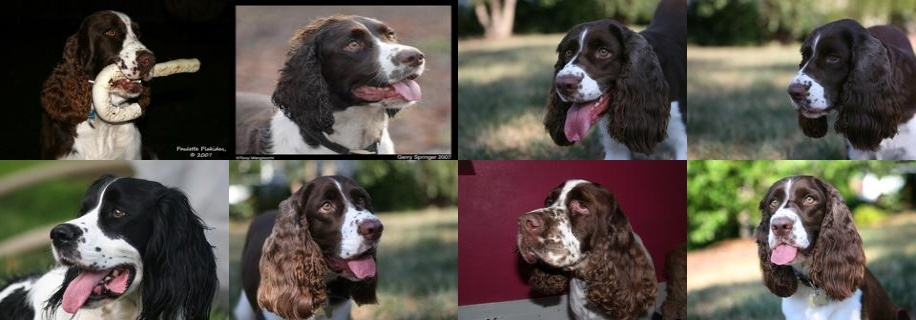
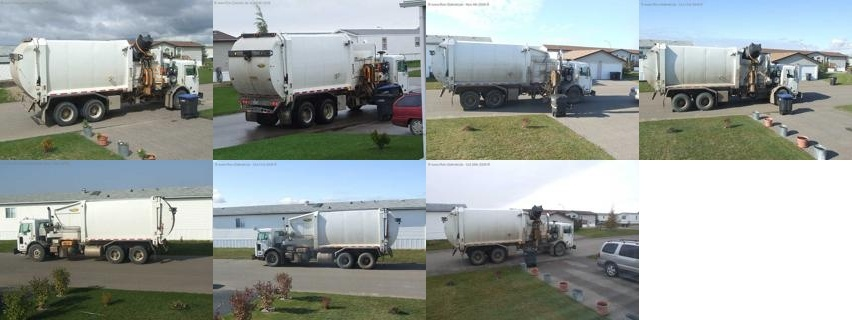
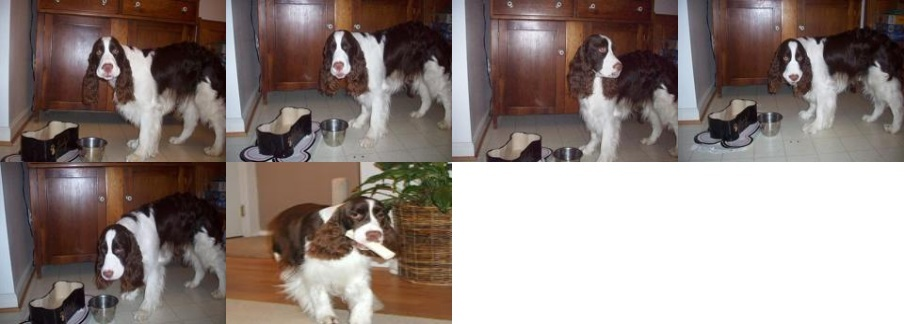
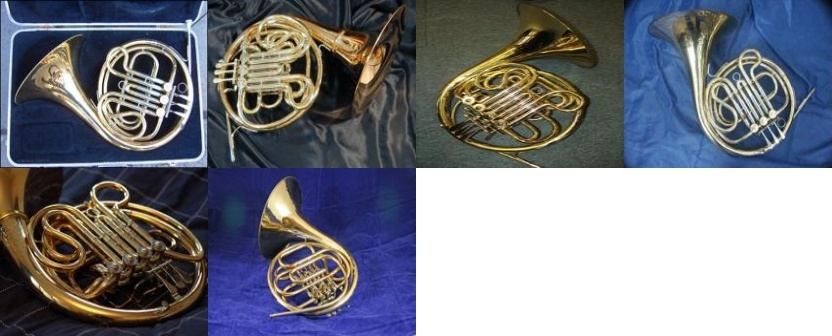
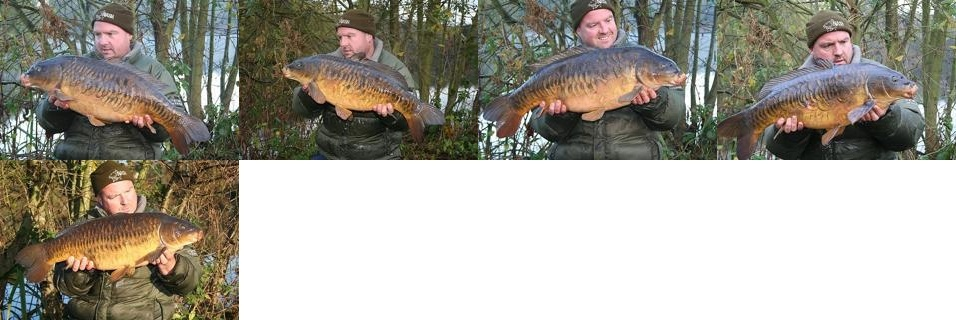
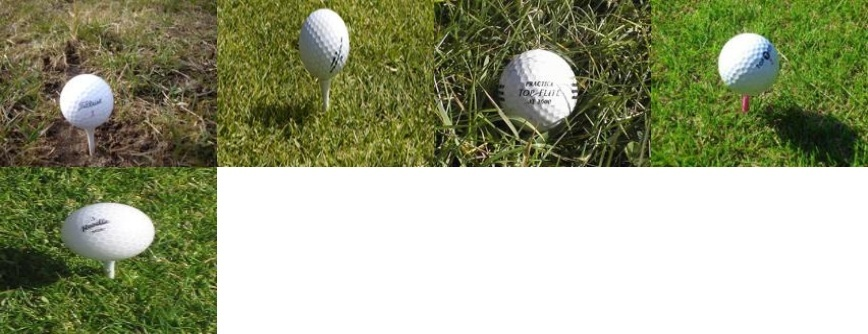
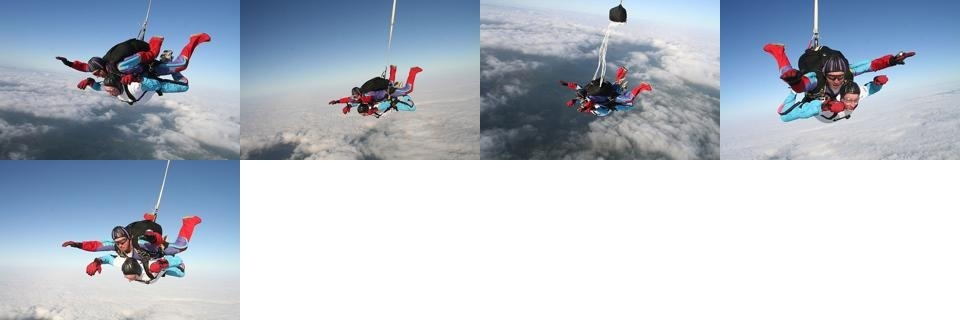
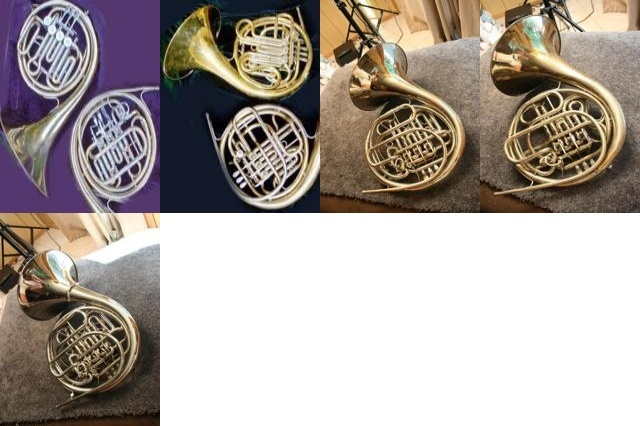
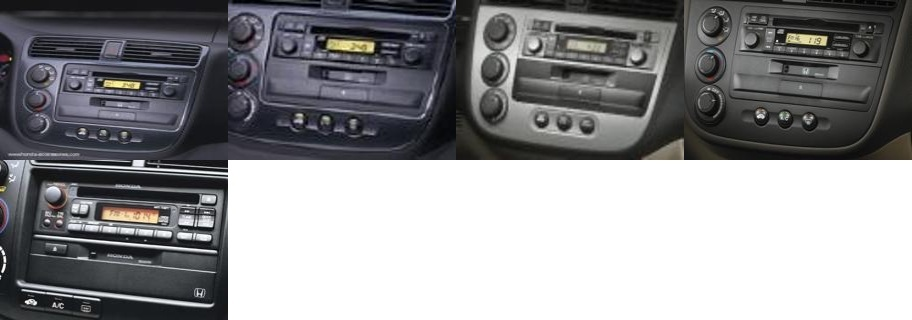
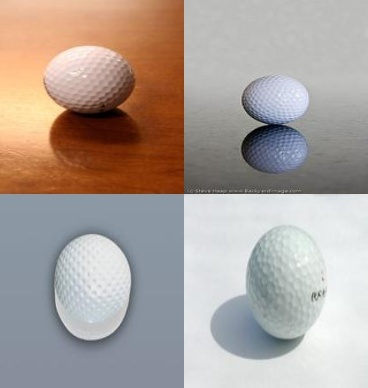
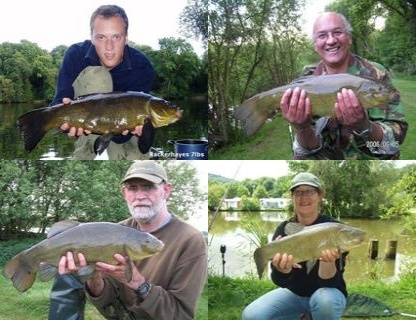

0

In [14]:
fd.vis.component_gallery()

You can also visualize clusters with specific labels using the `slice` parameter. For example let's visualize clusters with the `chain_saw` label

chain_saw


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 449.14it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.2



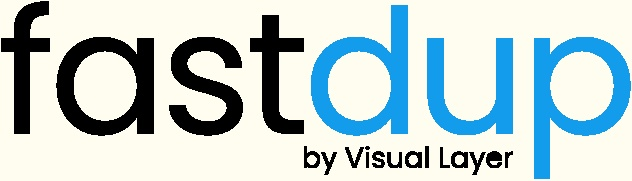
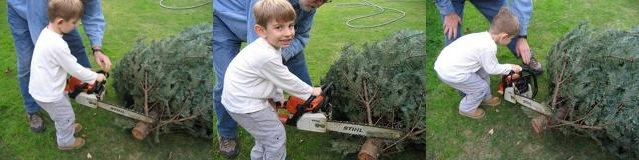
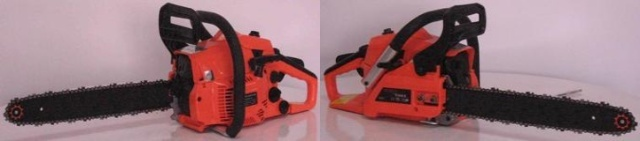
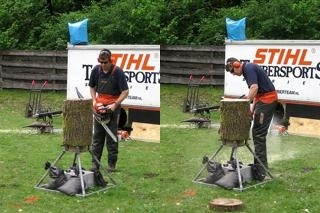
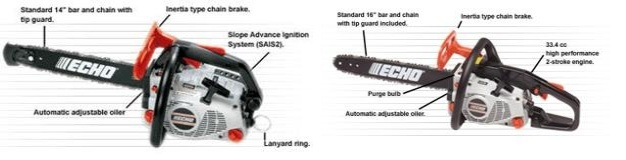
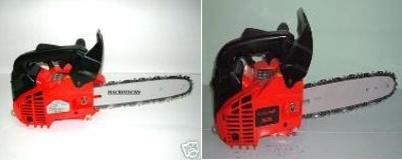
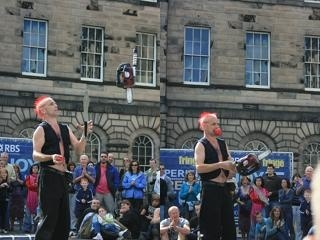
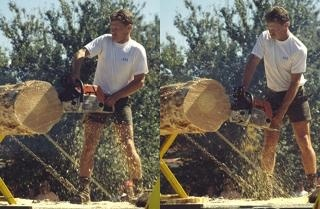
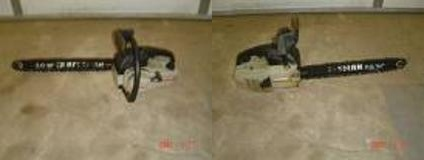
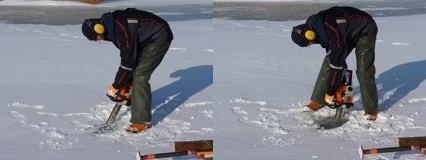
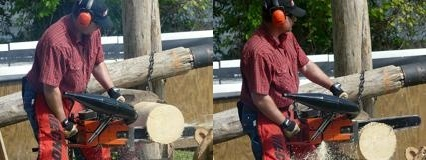
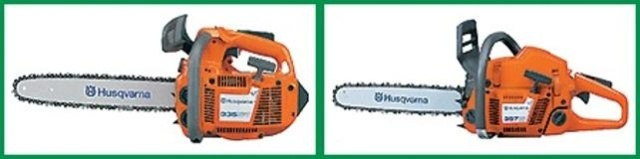

0

In [15]:
fd.vis.component_gallery(slice='chain_saw')

## Connected Components

In [16]:
cc_df, _ = fd.connected_components()
cc_df.sort_values('count', ascending=False).head(5)

index  component_id       sum  count  mean_distance  min_distance  max_distance                                              filename  label  split error_code  is_valid  fd_index
179   2355          1894  513.6729  562.0          0.914        0.9001        0.9534   imagenette2-160/train/n01440764/n01440764_8673.JPEG  tench  train      VALID      True      2355
143   2147          1894  513.6729  562.0          0.914        0.9001        0.9534   imagenette2-160/train/n01440764/n01440764_5658.JPEG  tench  train      VALID      True      2147
145   2150          1894  513.6729  562.0          0.914        0.9001        0.9534  imagenette2-160/train/n01440764/n01440764_10726.JPEG  tench  train      VALID      True      2150
146   2174          1894  513.6729  562.0          0.914        0.9001        0.9534   imagenette2-160/train/n01440764/n01440764_6974.JPEG  tench  train      VALID      True      2174
147   2177          1894  513.6729  562.0          0.914        0.9001        0.9534  imagenette2-160/train/n01440764/n01440764_14294.JPEG  tench  train      VALID      True      2177

We can also get metadata for individual images using their `fastdup_id` available in `fd.annotations()`

In [17]:
fd[349]

{'filename': 'imagenette2-160/train/n02979186/n02979186_2819.JPEG',
 'label': 'cassette_player',
 'split': 'train',
 'index': 349,
 'error_code': 'VALID',
 'is_valid': True,
 'fd_index': 349}

## Wrap Up

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).